# **Chapter 12**

## **2.**

###**(a)**

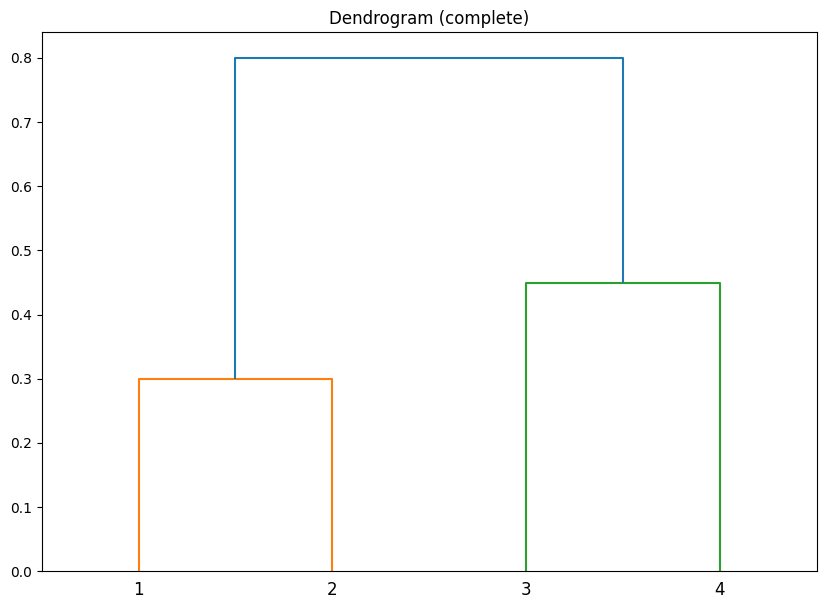

In [142]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt
import pandas as pd

# Creating the matrix equivalent to the R code
m = np.array([
    [0, 0.3, 0.4, 0.7],
    [0.3, 0, 0.5, 0.8],
    [0.4, 0.5, 0, 0.45],
    [0.7, 0.8, 0.45, 0]
])

dists = squareform(m)

# Perform hierarchical clustering using 'complete' linkage
Z_complete = linkage(dists, method='complete')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (complete)")
dendrogram(Z_complete, labels=[1, 2, 3, 4])
plt.show()


### **(b)**

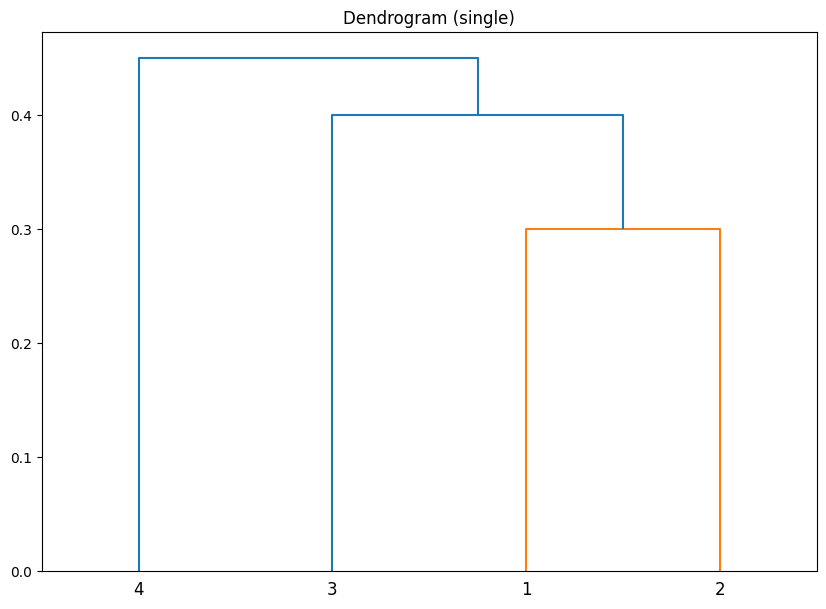

In [143]:
# Perform hierarchical clustering using 'single' linkage
Z_single = linkage(dists, method='single')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (single)")
dendrogram(Z_single, labels=[1, 2, 3, 4])
plt.show()

### **(c)**

In [144]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

# Cut the dendrogram to form two clusters
cluster_assignments = fcluster(Z_complete, 2, criterion='maxclust')

# Create a DataFrame for easy viewing
df = pd.DataFrame({
    'Observation': np.arange(1, 5),
    'Cluster': cluster_assignments
})

# Count the number of observations in each cluster
cluster_counts = df.groupby('Cluster')['Observation'].apply(list)
print(cluster_counts)

Cluster
1    [1, 2]
2    [3, 4]
Name: Observation, dtype: object


### **(d)**

In [145]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
import pandas as pd

# Cut the dendrogram to form two clusters
cluster_assignments = fcluster(Z_single, 2, criterion='maxclust')

# Create a DataFrame for easy viewing
df = pd.DataFrame({
    'Observation': np.arange(1, 5),
    'Cluster': cluster_assignments
})

# Count the number of observations in each cluster
cluster_counts = df.groupby('Cluster')['Observation'].apply(list)
print(cluster_counts)

Cluster
1    [1, 2, 3]
2          [4]
Name: Observation, dtype: object


### **(e)**

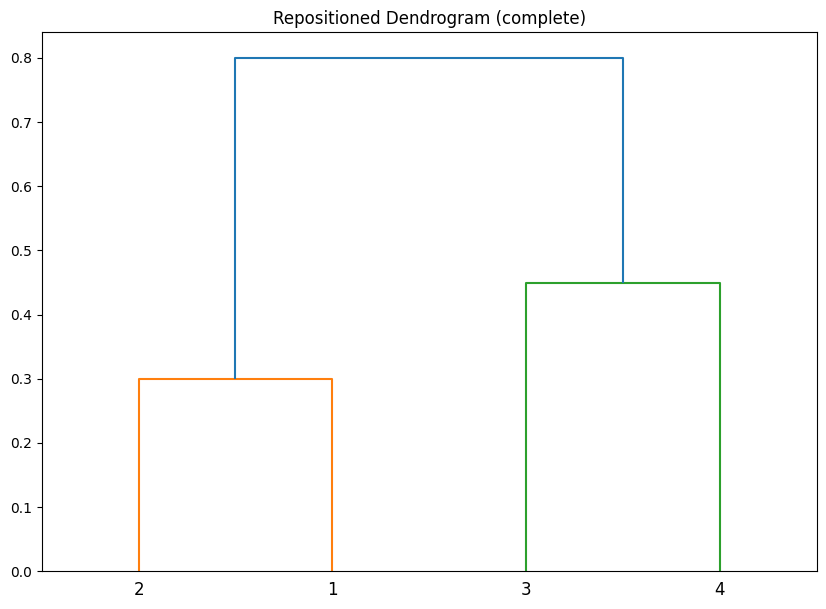

In [146]:
# Reorder the matrix by swapping some rows and corresponding columns
# For example, swapping rows (and columns) 1 and 3m_reordered = m[[1, 0, 2, 3], :][:, [1, 0, 2, 3]]
m_reordered = m[[1, 0, 2, 3], :][:, [1, 0, 2, 3]]

reordered_dists = squareform(m_reordered)

# Perform hierarchical clustering on the reordered matrix
Z_reordered = linkage(reordered_dists, method='complete')

# Plotting the dendrogram for the reordered matrix
plt.figure(figsize=(10, 7))
plt.title("Repositioned Dendrogram (complete)")
dendrogram(Z_reordered, labels=[2, 1, 3, 4])
plt.show()

**There's no difference whether we reorder leaves within same cluster**

<ipython-input-147-e8860cfdff3a>:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_reordered = linkage(m_reordered, method='complete')


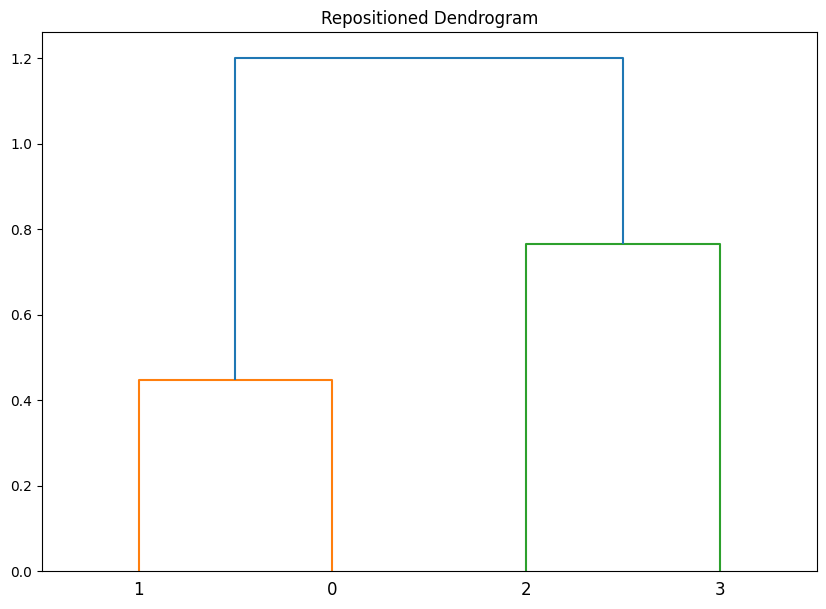

In [147]:
# Reorder the matrix by swapping some rows and corresponding columns
# For example, swapping rows (and columns) 1 and 3m_reordered = m[[1, 0, 2, 3], :][:, [1, 0, 2, 3]]
m_reordered = m[[1, 0, 2, 3], :][:, [1, 0, 2, 3]]

# Perform hierarchical clustering on the reordered matrix
Z_reordered = linkage(m_reordered, method='complete')

# Plotting the dendrogram for the reordered matrix
plt.figure(figsize=(10, 7))
plt.title("Repositioned Dendrogram")
dendrogram(Z_reordered, labels=[1, 0, 2, 3])
plt.show()

## **3.**

### **(a)**

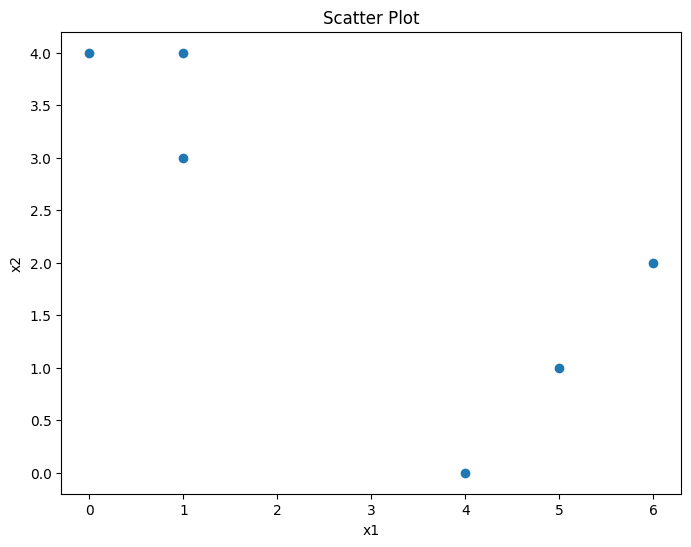

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating the data frame equivalent to the R code
d = pd.DataFrame({
    'x1': [1, 1, 0, 5, 6, 4],
    'x2': [4, 3, 4, 1, 2, 0]
})
d.index = d.index + 1

# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(d['x1'], d['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot')
plt.show()


### **(b)**

In [149]:
# Setting the seed for reproducibility
np.random.seed(42)

# Assigning a random cluster (1 or 2) to each row
d['cluster'] = np.random.choice([1, 2], size=len(d), replace=True)

# Display the data frame
print(d)

   x1  x2  cluster
1   1   4        1
2   1   3        2
3   0   4        1
4   5   1        1
5   6   2        1
6   4   0        2


### **(c)**

In [150]:
import pandas as pd
import numpy as np

# Calculating centroids for each cluster
centroids = pd.DataFrame()
for i in [1, 2]:
    centroids[i] = d[d['cluster'] == i][['x1', 'x2']].mean(axis=0)

# Transposing the DataFrame for a format
centroids = centroids.T

# Display the centroids
print(centroids)

    x1    x2
1  3.0  2.75
2  2.5  1.50


### **(d)**

In [151]:
# Function to calculate Euclidean distance
def euclidean_distance(row, centroid):
    return np.sqrt((row['x1'] - centroid['x1'])**2 + (row['x2'] - centroid['x2'])**2)

In [152]:
# Calculating distances from each centroid
distances = pd.DataFrame()
for i in centroids.index:
    distances[i] = d.apply(euclidean_distance, axis=1, centroid=centroids.loc[i])

# Assigning the nearest cluster
d['cluster'] = distances.idxmin(axis=1)

# Display the updated DataFrame
print(d)

   x1  x2  cluster
1   1   4        1
2   1   3        1
3   0   4        1
4   5   1        2
5   6   2        1
6   4   0        2


### **(e)**

In [153]:
# Function to calculate Euclidean distance
def euclidean_distance(row, centroid):
    return np.sqrt((row['x1'] - centroid['x1'])**2 + (row['x2'] - centroid['x2'])**2)

In [154]:
def k_means_clustering(df, max_iterations=100):
    for _ in range(max_iterations):
        # Step 1: Compute the centroid for each cluster
        centroids = pd.DataFrame()
        for i in [1, 2]:
            centroids[i] = df[df['cluster'] == i][['x1', 'x2']].mean(axis=0)
        centroids = centroids.T

        # Step 2: Assign each observation to the closest centroid
        distances = pd.DataFrame()
        for i in centroids.index:
            distances[i] = df.apply(euclidean_distance, axis=1, centroid=centroids.loc[i])

        new_assignments = distances.idxmin(axis=1)

        # Check if cluster assignments have changed
        if new_assignments.equals(df['cluster']):
            break

        df['cluster'] = new_assignments

    return df

In [155]:
# Running the k-means clustering process
d = k_means_clustering(d)

# Display the final cluster assignments
print(d)

   x1  x2  cluster
1   1   4        1
2   1   3        1
3   0   4        1
4   5   1        2
5   6   2        2
6   4   0        2


### **(f)**

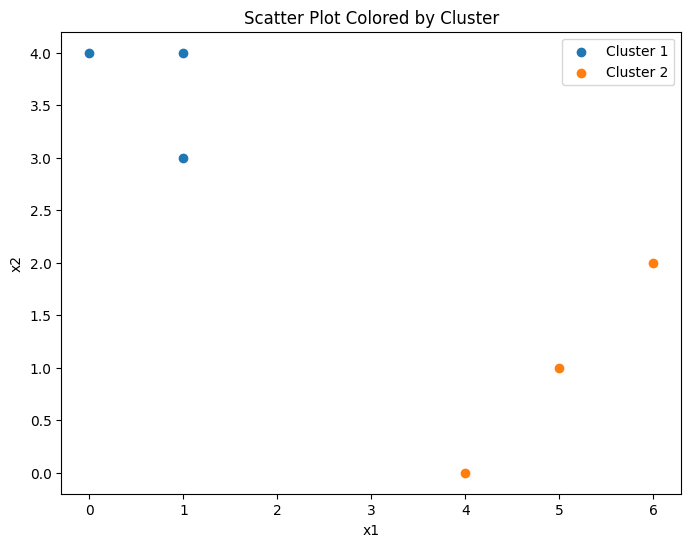

In [156]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the scatter plot with points colored by cluster
plt.figure(figsize=(8, 6))
for cluster in d['cluster'].unique():
    cluster_data = d[d['cluster'] == cluster]
    plt.scatter(cluster_data['x1'], cluster_data['x2'], label=f'Cluster {cluster}')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot Colored by Cluster')
plt.legend()
plt.show()


## **8.**

In [157]:
cd /content/drive/MyDrive/MAS456_컴퓨터통계방법론

/content/drive/MyDrive/MAS456_컴퓨터통계방법론


### **(a)**

In [158]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('./USArrests.csv', index_col='Unnamed: 0')

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Performing PCA
pca = PCA()
pca.fit(df_scaled)

# Proportion of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)

[0.62006039 0.24744129 0.0891408  0.04335752]


### **(b)**

In [159]:
# Performing PCA
pca = PCA()
pca.fit(df_scaled)
transformed_data = pca.transform(df_scaled)

# Calculating the proportion of total variance explained by each principal component
variance_explained = np.sum(transformed_data**2, axis=0) / np.sum(df_scaled**2)

print(variance_explained)

[0.62006039 0.24744129 0.0891408  0.04335752]


## **9.**

### **(a)**

In [160]:
len(pdist(df))

1225

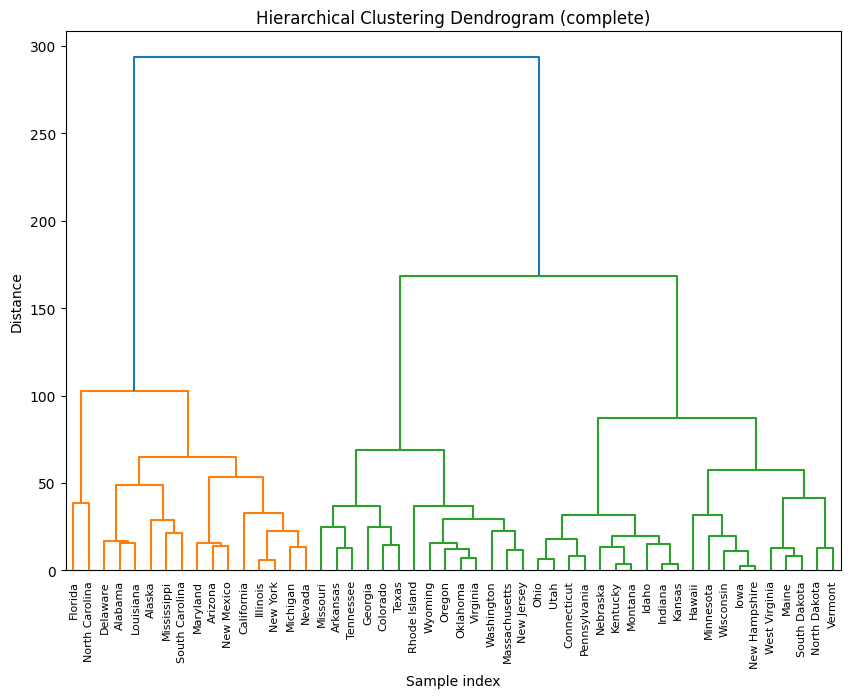

In [161]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Load dataset
df = pd.read_csv('./USArrests.csv', index_col='Unnamed: 0')

# Compute the distance matrix
distance_matrix = pdist(df)

# Perform hierarchical clustering using the complete linkage method
hc = linkage(distance_matrix, method='complete')

# Optionally, you can plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hc, labels=df.index)
plt.title("Hierarchical Clustering Dendrogram (complete)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

### **(b)**

In [162]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Cut the tree into 3 clusters
cluster_assignments = fcluster(hc, 3, criterion='maxclust')

# Create a DataFrame to map observations to their cluster assignments
df_clusters = pd.DataFrame({'observation': df.index, 'cluster': cluster_assignments})

# Group the observation names by cluster
clusters = {i: df_clusters['observation'][df_clusters['cluster'] == i].tolist() for i in range(1, 4)}

# Display the observations in each cluster
for cluster, observations in clusters.items():
    print(f"Cluster {cluster}: {observations}")


Cluster 1: ['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']
Cluster 2: ['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']
Cluster 3: ['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


### **(c)**

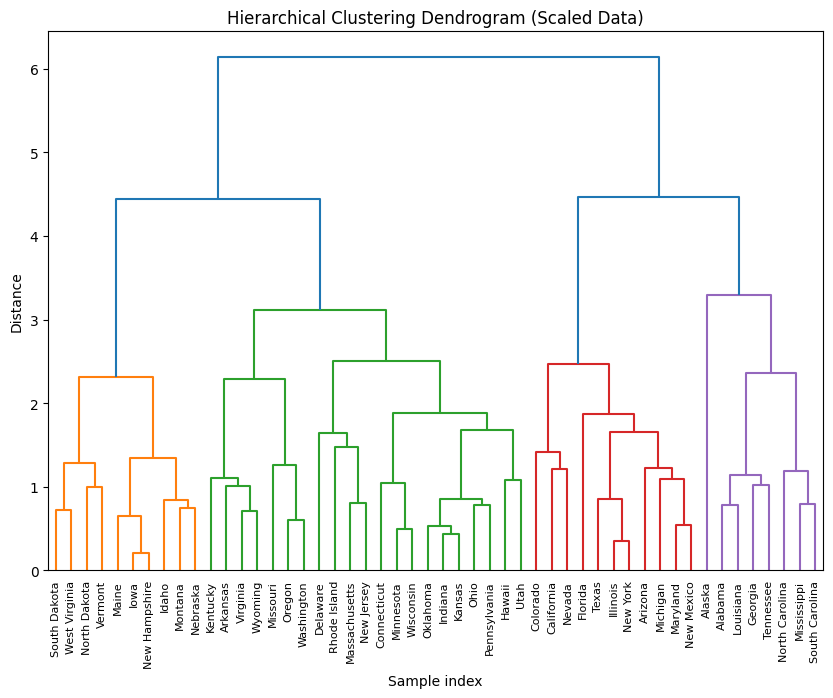

In [163]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Compute the distance matrix
distance_matrix = pdist(df_scaled)

# Perform hierarchical clustering using the complete linkage method
hc2 = linkage(distance_matrix, method='complete')

# Optionally, you can plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(hc2, labels=df.index)
plt.title("Hierarchical Clustering Dendrogram (Scaled Data)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


### **(d)**

In [164]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Cut the tree into 3 clusters
cluster_assignments = fcluster(hc, 3, criterion='maxclust')

# Create a DataFrame to map observations to their cluster assignments
df_clusters = pd.DataFrame({'observation': df.index, 'cluster': cluster_assignments})

# Group the observation names by cluster
clusters = {i: df_clusters['observation'][df_clusters['cluster'] == i].tolist() for i in range(1, 4)}

# Display the observations in each cluster
for cluster, observations in clusters.items():
    print(f"Cluster {cluster}: {observations}")


Cluster 1: ['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']
Cluster 2: ['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']
Cluster 3: ['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


In [165]:
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


## **13.**

### **(a)**

In [166]:
df = pd.read_csv('./Ch12Ex13.csv', header=None)
col_names = [f"H{i}" for i in range(1, 21)] + [f"D{i}" for i in range(1, 21)]
df.columns = col_names

In [167]:
df

,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,...,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.842161,-0.762154,0.546881,1.586981,-0.242043,0.507189,1.297424,0.314290,-1.513097,-0.074709
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114


### **(b)**

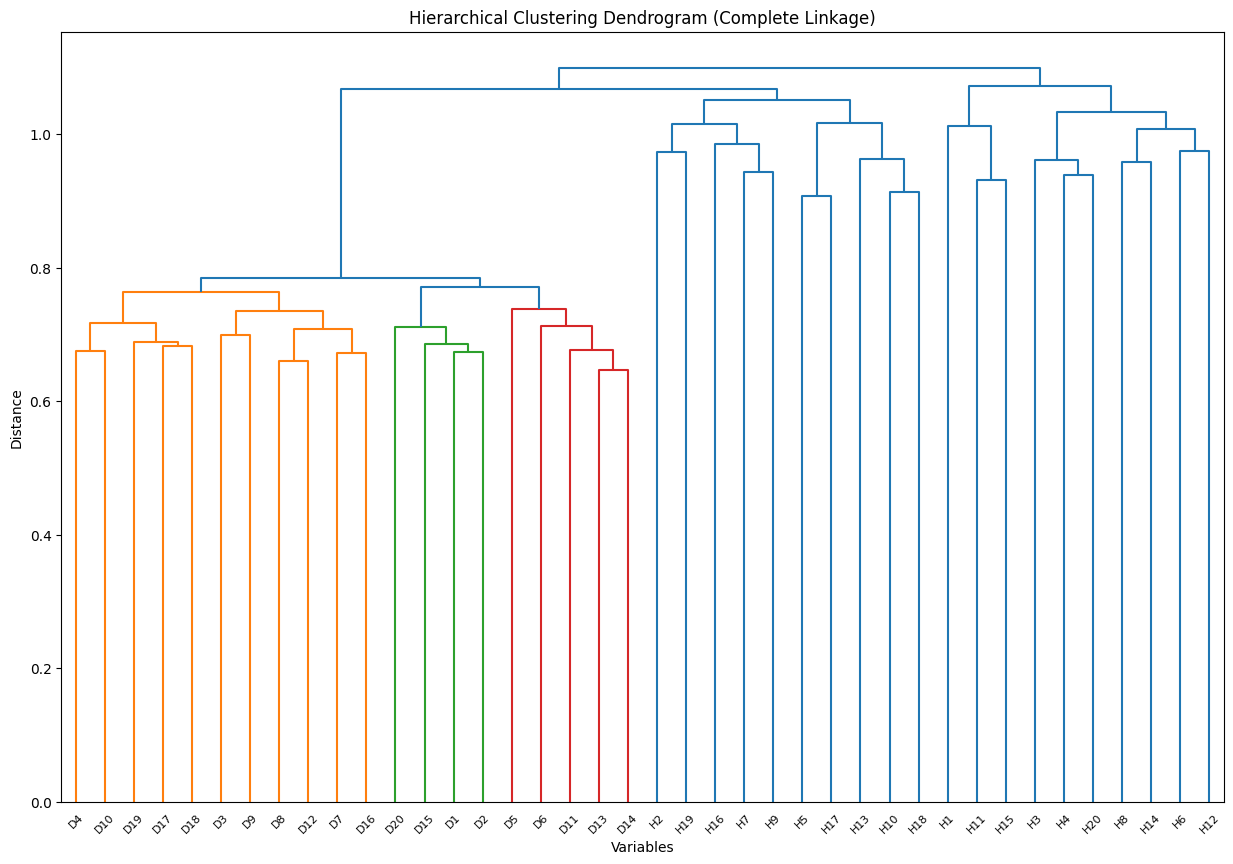

In [168]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Calculate the correlation matrix and then the distance matrix
correlation_matrix = df.corr()
distance_matrix = 1 - correlation_matrix

# Convert to condensed distance matrix for linkage function
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering using the complete linkage method
hc_complete = linkage(condensed_distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(hc_complete, labels=df.columns)
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Variables")
plt.ylabel("Distance")
plt.show()


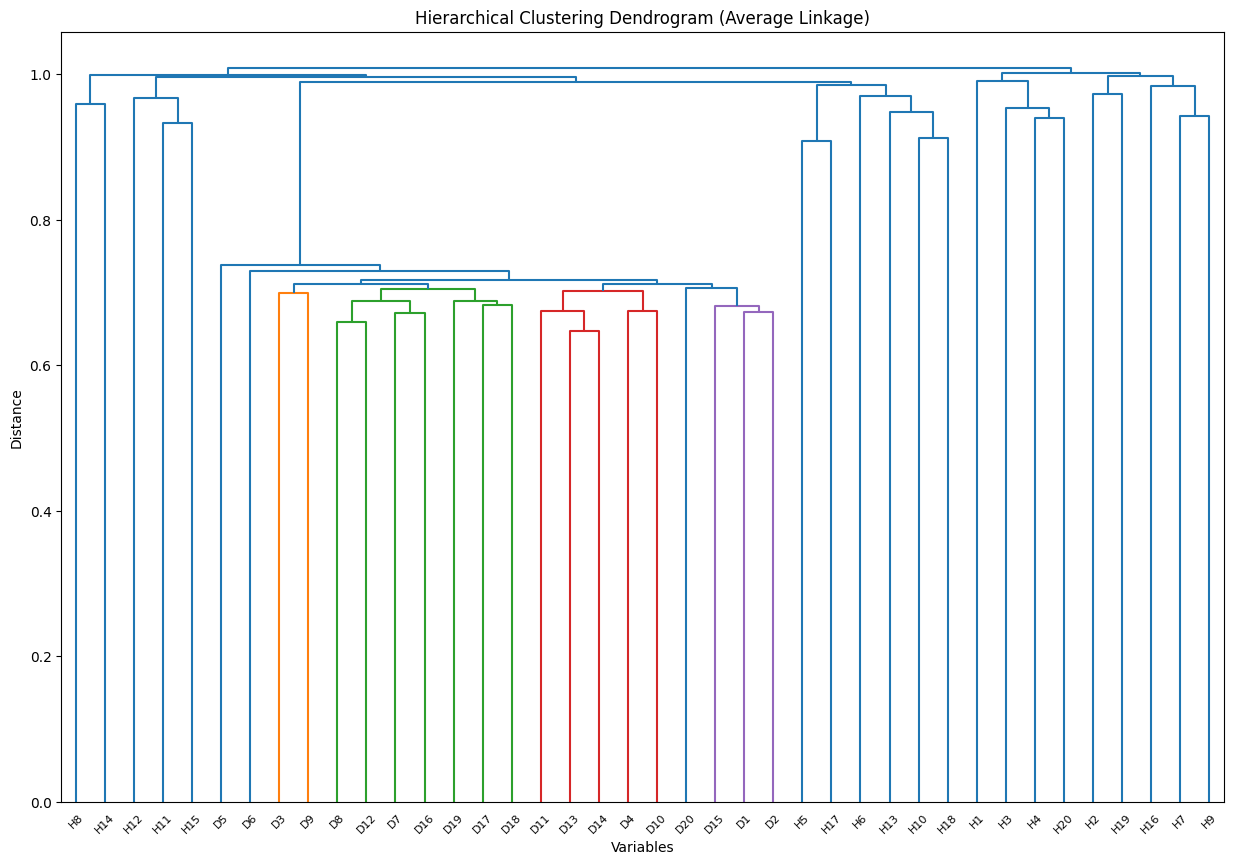

In [169]:
# Perform hierarchical clustering using the average linkage method
hc_average = linkage(condensed_distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(hc_average, labels=df.columns)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage)")
plt.xlabel("Variables")
plt.ylabel("Distance")
plt.show()


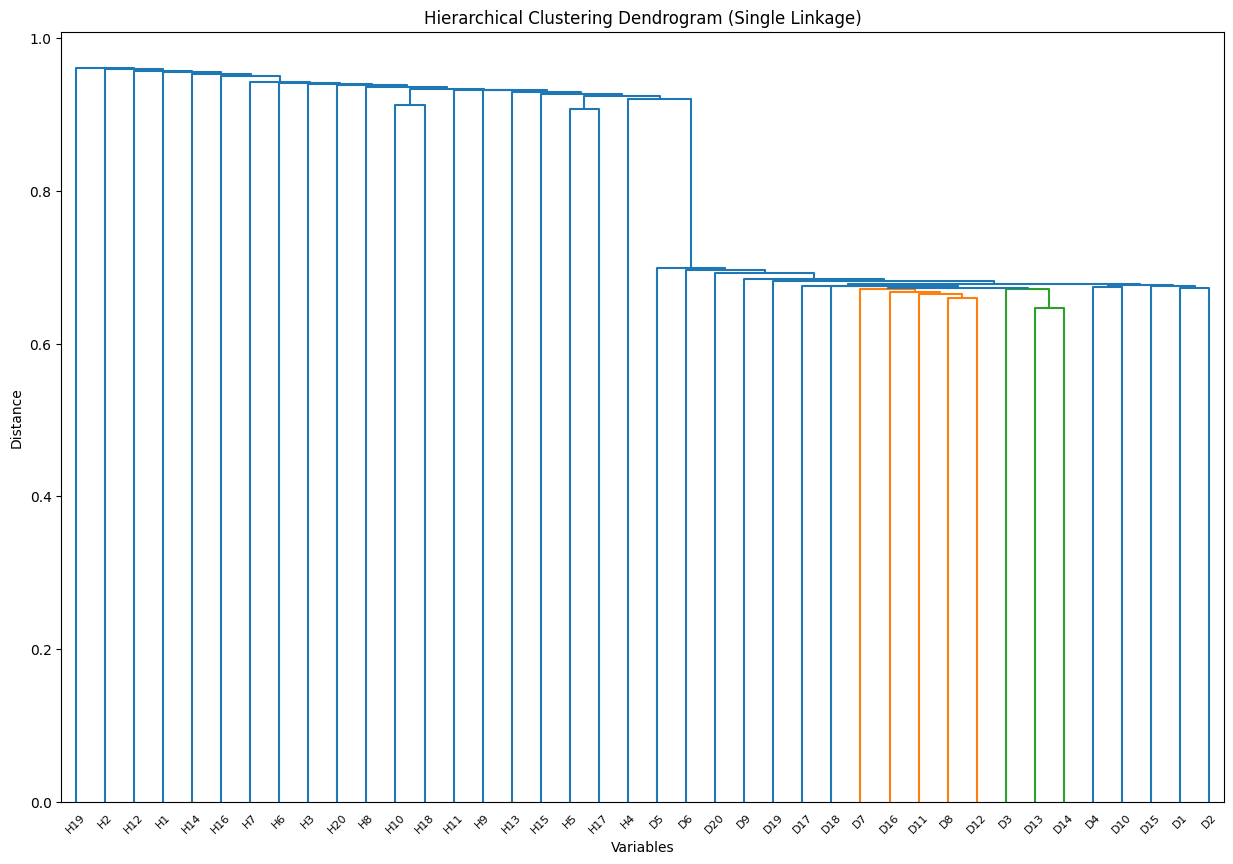

In [170]:
# Perform hierarchical clustering using the single linkage method
hc_single = linkage(condensed_distance_matrix, method='single')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(hc_single, labels=df.columns)
plt.title("Hierarchical Clustering Dendrogram (Single Linkage)")
plt.xlabel("Variables")
plt.ylabel("Distance")
plt.show()


### **(c)**

In [171]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

# Create the class labels
class_labels = np.repeat(["Healthy", "Diseased"], 20)

# Perform t-tests for each row
p_values = []
for index, row in df.iterrows():
    group1 = row[class_labels == "Healthy"]
    group2 = row[class_labels == "Diseased"]
    t_stat, p_val = ttest_ind(group1, group2)
    p_values.append(p_val)

# Adjust the p-values
adjusted_pvals = multipletests(p_values, method='bonferroni')[1]

# Find rows where adjusted p-value is less than 0.05
significant_rows = np.where(adjusted_pvals < 0.05)[0]

print("Significant rows:", significant_rows)


Significant rows: [ 10  11  12  13  14  15  16  17  18  19 500 501 502 503 504 505 506 507
 508 510 511 512 513 514 515 516 518 519 520 521 522 523 524 525 526 527
 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563
 564 565 566 567 568 569 570 571 573 574 575 576 577 578 579 580 581 582
 583 585 586 587 588 589 590 591 592 594 595 596 597 598 599]


# **Chapter 13**

##**8.**

###**(a)**

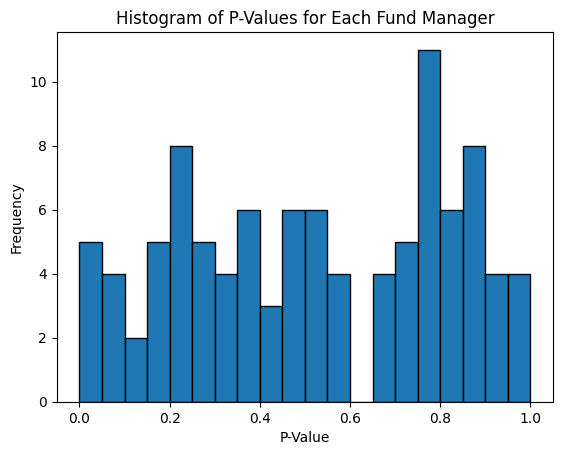

In [172]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Setting the random seed and generating a sample data matrix
rng = np.random.default_rng(5)
n = 20  # Number of months that evaluates return
m = 100  # Number of fund managers
X = rng.normal(size=(n, m))  # Sample data matrix

# Perform one-sample t-test for each fund manager
p_values = np.array([stats.ttest_1samp(X[:, i], 0).pvalue for i in range(m)])

# Plotting the histogram of the p-values
plt.hist(p_values, bins=np.linspace(0, 1, 21), edgecolor='black')
plt.xlabel('P-Value')
plt.ylabel('Frequency')
plt.title('Histogram of P-Values for Each Fund Manager')
plt.show()

###**(b)**

In [173]:
(p_values < 0.05).sum()

5

###**(c)**

In [174]:
(p_values < 0.05/m).sum()

0

###**(d)**

In [175]:
from statsmodels.stats.multitest import multipletests

# Controlling the False Discovery Rate (FDR) at level 0.05
fdr_adj_p_values = multipletests(p_values, alpha=0.05, method='fdr_bh')[1]
fdr_rejections = np.sum(fdr_adj_p_values < 0.05)
fdr_rejections

0

### **(e)**

In [176]:
# Cherry-picking the 10 best-performing fund managers based on their mean returns
top_10_indices = np.argsort(X.mean(axis=0))[-10:]

# P-values for the top 10 fund managers
top_10_p_values = p_values[top_10_indices]

# Controlling the FWER for the top 10 fund managers using Bonferroni correction
fwer_adj_p_values_top_10 = multipletests(top_10_p_values, alpha=0.05, method='bonferroni')[1]
fwer_rejections_top_10 = np.sum(fwer_adj_p_values_top_10 < 0.05)

# Controlling the FDR for the top 10 fund managers using Benjamini-Hochberg procedure
fdr_adj_p_values_top_10 = multipletests(top_10_p_values, alpha=0.05, method='fdr_bh')[1]
fdr_rejections_top_10 = np.sum(fdr_adj_p_values_top_10 < 0.05)

fwer_rejections_top_10, fdr_rejections_top_10

(1, 2)

### **(f)**

This is because we selectively performed the test with the data that are likely to be rejected. Therefore, results from this test cannot represent the whole data.